# Checking out some instances to check if everything works fine

In [1]:
# import the stuff
from cetsp_bnb2 import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution, compute_tour_from_sequence

In [2]:
# Load instances
import aemeasure
db_ = aemeasure.Database("instance_db")
data = db_.load()
instances = {instance["instance"]: instance  for instance in data}

In [3]:
list(instances.keys())

['rnd_ol01/CETSP-70-2',
 'rnd_ol01/CETSP-30-4',
 'rnd_ol01/CETSP-190-1',
 'rnd_ol01/CETSP-30-3',
 'rnd_ol01/CETSP-150-2',
 'rnd_ol01/CETSP-110-3',
 'rnd_ol01/CETSP-110-4',
 'rnd_ol01/CETSP-30-2',
 'rnd_ol01/CETSP-190-0',
 'rnd_ol01/CETSP-70-3',
 'rnd_ol01/CETSP-70-4',
 'rnd_ol01/CETSP-110-2',
 'rnd_ol01/CETSP-150-4',
 'rnd_ol01/CETSP-150-3',
 'rnd_ol01/CETSP-20-2',
 'rnd_ol01/CETSP-180-0',
 'rnd_ol01/CETSP-60-3',
 'rnd_ol01/CETSP-60-4',
 'rnd_ol01/CETSP-100-2',
 'rnd_ol01/CETSP-200-3',
 'rnd_ol01/CETSP-140-4',
 'rnd_ol01/CETSP-140-3',
 'rnd_ol01/CETSP-200-4',
 'rnd_ol01/CETSP-60-2',
 'rnd_ol01/CETSP-20-4',
 'rnd_ol01/CETSP-180-1',
 'rnd_ol01/CETSP-20-3',
 'rnd_ol01/CETSP-140-2',
 'rnd_ol01/CETSP-200-2',
 'rnd_ol01/CETSP-100-3',
 'rnd_ol01/CETSP-100-4',
 'rnd_ol01/CETSP-130-1',
 'rnd_ol01/CETSP-90-4',
 'rnd_ol01/CETSP-90-3',
 'rnd_ol01/CETSP-170-0',
 'rnd_ol01/CETSP-10-1',
 'rnd_ol01/CETSP-50-0',
 'rnd_ol01/CETSP-170-1',
 'rnd_ol01/CETSP-90-2',
 'rnd_ol01/CETSP-130-0',
 'rnd_ol01/CETSP-

In [9]:
instance = Instance([Circle(Point(float(d["x"]), float(d["y"])), float(d["radius"])) for d in instances['rnd_ol01/CETSP-200-4']["circles"]])

Removed implicit circle (46.4654, 1.92312)
Removed implicit circle (43.7248, 66.1455)
Removed implicit circle (46.8564, 3.33991)
Removed implicit circle (44.4093, 1.35978)
Removed implicit circle (50.2953, 64.3519)
Removed implicit circle (63.0021, 39.9595)
Removed implicit circle (91.7413, 84.507)
Removed implicit circle (20.1955, 6.40497)
Removed implicit circle (16.7771, 7.31682)
Removed implicit circle (92.1805, 74.316)
Removed implicit circle (72.1988, 61.5245)
Removed implicit circle (65.7585, 75.3432)
Removed implicit circle (47.1377, 51.8405)
Removed implicit circle (88.2049, 75.1159)
Removed implicit circle (56.8936, 39.7525)
Removed implicit circle (74.8428, 35.9677)
Removed implicit circle (45.1232, 11.5256)
Removed implicit circle (50.0761, 50.0821)
Removed implicit circle (46.6464, 60.483)
Removed implicit circle (98.2455, 73.3491)
Removed implicit circle (52.9192, 24.3449)
Removed implicit circle (3.66792, 22.6734)
Removed implicit circle (25.2891, 70.3787)
Removed implic

AttributeError: 'list' object has no attribute 'get_trajectory'

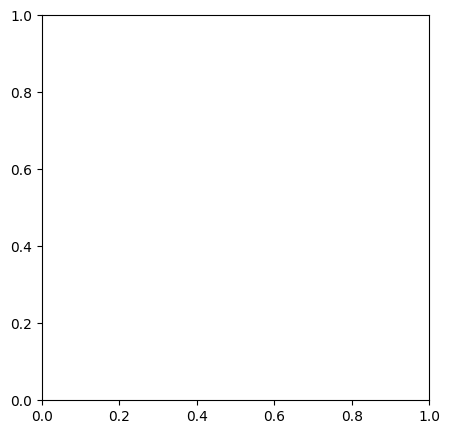

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, [])

In [10]:
# trigger_lazy_computation an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance)

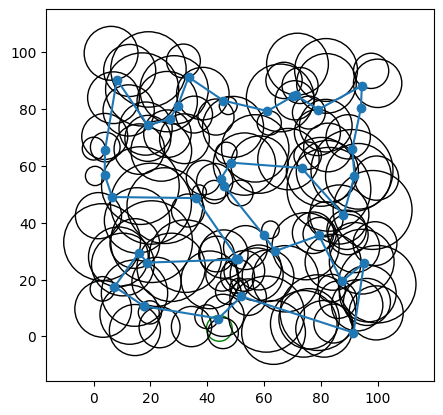

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, initial_solution, highlight=[15])

In [12]:
timelimit = 220
node_values = []
def count(event):
    return
    global node_values
    node_values.append(event.current_node.get_relaxed_solution().length())
    ub = event.get_upper_bound()
    lb = event.get_lower_bound()
    depth = event.current_node.depth()

    if event.num_iterations % 100 == 0:
        plt.figure(figsize=(5, 5))
        plot_solution(plt.gca(), instance, event.get_relaxed_solution(), highlight=event.current_node.get_fixed_sequence())
        plt.title(event.get_relaxed_solution().length())
        plt.show()
        
opt_solution, lb,stats = branch_and_bound(instance, count, initial_solution, timelimit)

Using node simplification.
Exploring on 8 threads
Branching on farthest circle.
Using ChFarthestCircle-Branching
Using DfsBfs search
Starting with root node of size 12
i	LB	|	UB	|	Time
1	355.945	|	554.608	|	0.007s
2	358.532	|	554.608	|	0.01s
3	358.532	|	554.608	|	0.02s
4	358.532	|	554.608	|	0.023s
5	358.532	|	554.608	|	0.031s
6	358.532	|	554.608	|	0.039s
7	358.532	|	554.608	|	0.051s
8	358.532	|	554.608	|	0.064s
9	358.532	|	554.608	|	0.067s
10	358.532	|	554.608	|	0.071s
20	358.532	|	554.608	|	0.212s
30	358.532	|	554.608	|	0.479s
40	378.592	|	482.431	|	0.557s
50	381.046	|	482.431	|	0.645s
60	381.046	|	482.431	|	0.734s
70	381.046	|	482.431	|	0.906s
80	381.683	|	482.431	|	0.961s
90	383.44	|	482.431	|	1.055s
100	383.44	|	482.431	|	1.139s
200	396.972	|	456.587	|	2.242s
300	404.381	|	456.587	|	3.002s
400	410.47	|	456.587	|	3.54s
500	412.137	|	456.587	|	4.231s
600	415.463	|	456.587	|	4.857s
700	417.168	|	456.587	|	5.586s
800	419.332	|	456.587	|	6.301s
900	421.301	|	456.587	|	7.113s
1000	422.22

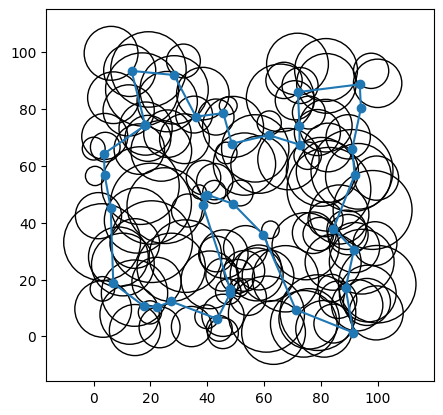

In [13]:
plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, opt_solution)